In [1]:
import pandas as pd
import numpy as np

In [2]:
survey_raw_df  = pd.read_csv('.\data\survey_results_public.csv')
survey_raw_df .head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [71]:
survey_raw_df.index

RangeIndex(start=0, stop=64461, step=1)

In [5]:
schema_fname = 'data/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [6]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [7]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [8]:
#Make a copy and filter selected columns
survey_df = survey_raw_df[selected_columns].copy()
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [9]:
schema = schema_raw[selected_columns]

In [10]:
survey_df.shape

(64461, 20)

In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [92]:
survey_df.isna().any()

Country                    True
Age                        True
Gender                     True
EdLevel                    True
UndergradMajor             True
Hobbyist                   True
Age1stCode                 True
YearsCode                  True
YearsCodePro               True
LanguageWorkedWith         True
LanguageDesireNextYear     True
NEWLearn                   True
NEWStuck                   True
Employment                 True
DevType                    True
WorkWeekHrs                True
JobSat                     True
JobFactors                 True
NEWOvertime                True
NEWEdImpt                  True
Is_woman                  False
dtype: bool

In [91]:
survey_df.isna().sum().sort_values(ascending=False)

WorkWeekHrs               23493
NEWOvertime               21430
YearsCodePro              20512
JobSat                    19471
Age                       19238
NEWEdImpt                 16214
JobFactors                15365
DevType                   15323
Gender                    14191
UndergradMajor            13687
LanguageDesireNextYear    10618
NEWStuck                   9769
NEWLearn                   8576
YearsCode                  7967
LanguageWorkedWith         7374
EdLevel                    7325
Age1stCode                 7279
Employment                  912
Country                     700
Hobbyist                    356
Is_woman                      0
dtype: int64

In [12]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [13]:
#Convert to numeric type
survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')

In [14]:
#Summary statistics
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [15]:
#Drop rows
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64306 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63917 non-null  object 
 1   Age                     45319 non-null  float64
 2   Gender                  50426 non-null  object 
 3   EdLevel                 57280 non-null  object 
 4   UndergradMajor          50871 non-null  object 
 5   Hobbyist                64261 non-null  object 
 6   Age1stCode              57326 non-null  float64
 7   YearsCode               56636 non-null  float64
 8   YearsCodePro            43993 non-null  float64
 9   LanguageWorkedWith      57236 non-null  object 
 10  LanguageDesireNextYear  53975 non-null  object 
 11  NEWLearn                56020 non-null  object 
 12  NEWStuck                54840 non-null  object 
 13  Employment              63700 non-null  object 
 14  DevType                 49225 non-null

In [16]:
#Filter gender
#Replace values where the condition is False
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)
#survey_df.loc[survey_df.Gender.str.contains(';', na=False),'Gender'] = np.nan

In [17]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
21835,Spain,27.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",No,17.0,10.0,3.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;JavaScript;SQL;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Very important
59685,Serbia,20.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,5.0,NaN,C;HTML/CSS;Java;JavaScript,Go;Python;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Remote work o...,NaN,NaN
23948,Netherlands,28.0,Man,Some college/university study without earning ...,NaN,No,16.0,11.0,7.0,C#;Python,NaN,Once every few years,Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, front-end",40.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Sometimes: 1-2 days per month but less than we...,Fairly important
48329,United Kingdom,27.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)",Mathematics or statistics,Yes,18.0,9.0,5.0,Java;JavaScript;Python;R;Scala;SQL,JavaScript;Python;R;SQL,Every few months,Visit Stack Overflow,Employed full-time,Data or business analyst;Data scientist or mac...,37.5,Very satisfied,Financial performance or funding status of the...,Occasionally: 1-2 days per quarter but less th...,Critically important
20973,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,20.0,NaN,NaN,Swift,Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, front-end",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
12337,Switzerland,NaN,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Information systems, information technology, o...",Yes,18.0,35.0,35.0,HTML/CSS;Java;JavaScript;Perl;SQL;VBA,HTML/CSS;Java;JavaScript;SQL,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Database administrator;Designer;Developer, bac...",50.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
9693,Russian Federation,70.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",Yes,21.0,50.0,30.0,C#;HTML/CSS;JavaScript;Python;TypeScript,C#;HTML/CSS;JavaScript;Python;Swift;TypeScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Senior executive/VP,35.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Sometimes: 1-2 days per month but less than we...,Fairly important
14916,United States,NaN,NaN,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,8.0,23.0,6.0,Bash/Shell/PowerShell;Go;JavaScript;Python;Rub...,C;Go;Python;Ruby,Once a year,Meditate;Play games;Call a coworker or friend;...,Employed full-time,"Developer, full-stack;DevOps specialist;System...",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
27864,Mexico,45.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,12.0,30.0,18.0,Bash/Shell/PowerShell;HTML/CSS;Perl;PHP;SQL,C#;C++;Go;Java;JavaScript;PHP;Python;R;Ruby;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data or business analyst;Data scientist or mac...,48.0,Very satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Very im

In [75]:
survey_df[survey_df.Age1stCode.notnull()].sort_values(['Country','Age1stCode']).head(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,Is_woman
38261,Afghanistan,NaN,NaN,I never completed any formal education,NaN,No,5.0,40.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Very satisfied,NaN,NaN,NaN,False
28270,Afghanistan,NaN,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)",Mathematics or statistics,Yes,7.0,17.0,5.0,Bash/Shell/PowerShell;C;C++;Java,...,NaN,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, desktop or enterprise applications;...",NaN,Slightly satisfied,Industry that I’d be working in;Specific depar...,Occasionally: 1-2 days per quarter but less th...,Fairly important,False
63925,Afghanistan,NaN,NaN,I never completed any formal education,NaN,No,8.0,30.0,35.0,NaN,...,NaN,NaN,"Independent contractor, freelancer, or self-em...",Data or business analyst;Data scientist or mac...,4.0,Very dissatisfied,NaN,Never,NaN,False
41506,Afghanistan,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,9.0,2.0,NaN,HTML/CSS,...,NaN,NaN,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Financial per...,NaN,NaN,False
50812,Afghanistan,15.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,10.0,5.0,2.0,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,...,NaN,Play games;Visit Stack Overflow;Go for a walk ...,"Independent contractor, freelancer, or self-em...","Designer;Developer, back-end;Developer, deskto...",28.0,Slightly satisfied,Remote work options;How widely used or impactf...,Often: 1-2 days per week or more,Fairly important,False


In [18]:
##Exploratory Analysis and Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Config
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
survey_df.Country.nunique()

183

In [20]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

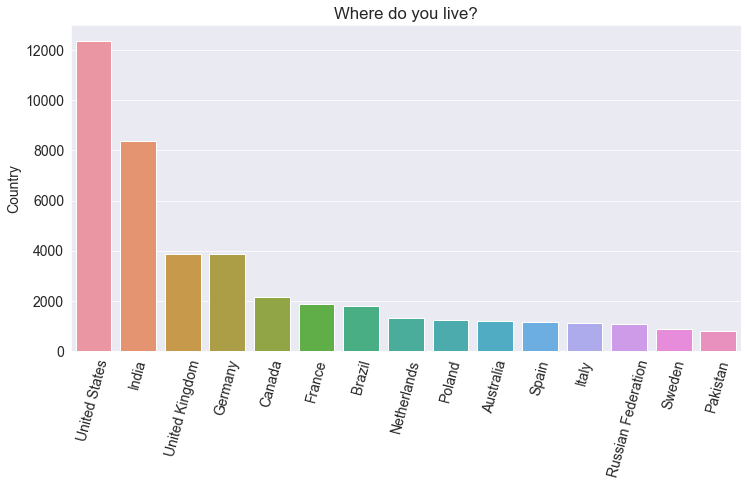

In [21]:
#Country
plt.figure(figsize = (12, 6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x = top_countries.index, y=top_countries);

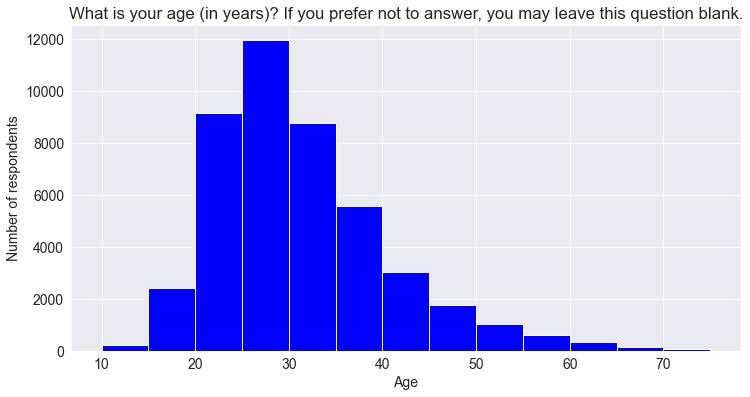

In [22]:
#Age
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='blue');

In [23]:
print(min(survey_df.Age.dropna()))
print(max(survey_df.Age.dropna()))

10.0
99.0


C:\Users\USUARIO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

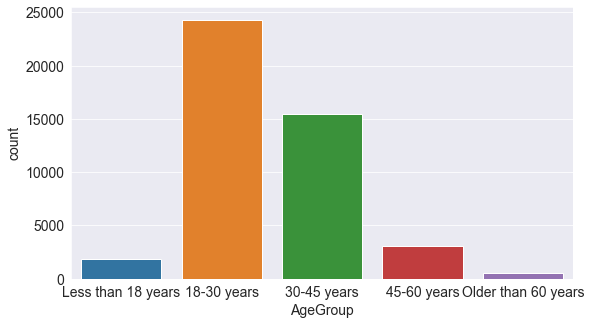

In [24]:
survey_df['AgeGroup'] = pd.cut(survey_df.Age, [10, 18, 30, 45, 60, 100], labels=['Less than 18 years', '18-30 years', 
                                                        '30-45 years', '45-60 years', 'Older than 60 years'])
#survey_df['Age_range'].value_counts().plot(kind='bar')

#Categorical variable
sns.countplot(survey_df['AgeGroup'])

In [25]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [23]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

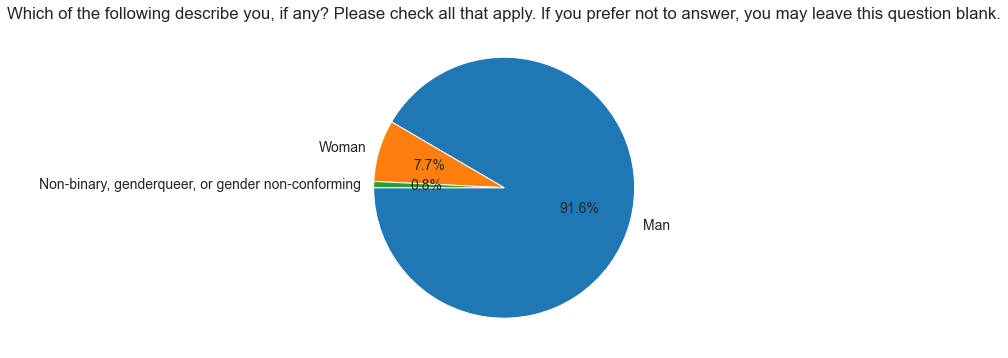

In [24]:
#Pie chart pandas serie
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [32]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'AgeGroup'],
      dtype='object')

In [37]:
survey_df.Gender.value_counts(normalize=False)

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [60]:
survey_df.groupby('Country')['Gender'].value_counts(normalize=True)

Country      Gender                                           
Afghanistan  Man                                                  0.848485
             Woman                                                0.121212
             Non-binary, genderqueer, or gender non-conforming    0.030303
Albania      Man                                                  0.969697
             Woman                                                0.030303
                                                                    ...   
Viet Nam     Woman                                                0.028846
             Non-binary, genderqueer, or gender non-conforming    0.004808
Yemen        Man                                                  1.000000
Zambia       Man                                                  1.000000
Zimbabwe     Man                                                  1.000000
Name: Gender, Length: 351, dtype: float64

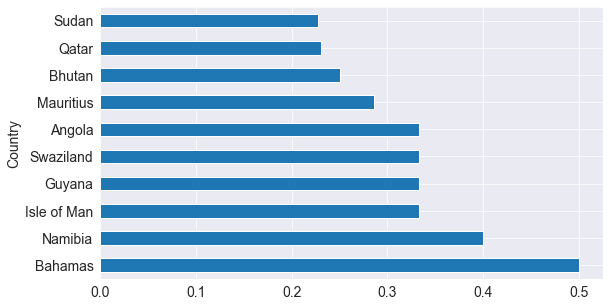

In [26]:
#Countries with highest percentage of women
survey_df['Is_woman'] =  survey_df.Gender=='Woman'
count_gender_country = survey_df[survey_df.Gender.notnull()].groupby('Country')['Gender'].count()
count_women_country = survey_df[survey_df.Gender.notnull()].groupby('Country')['Is_woman'].sum()
(count_women_country/count_gender_country).sort_values(ascending=False)[0:10].plot(kind='barh');

In [80]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

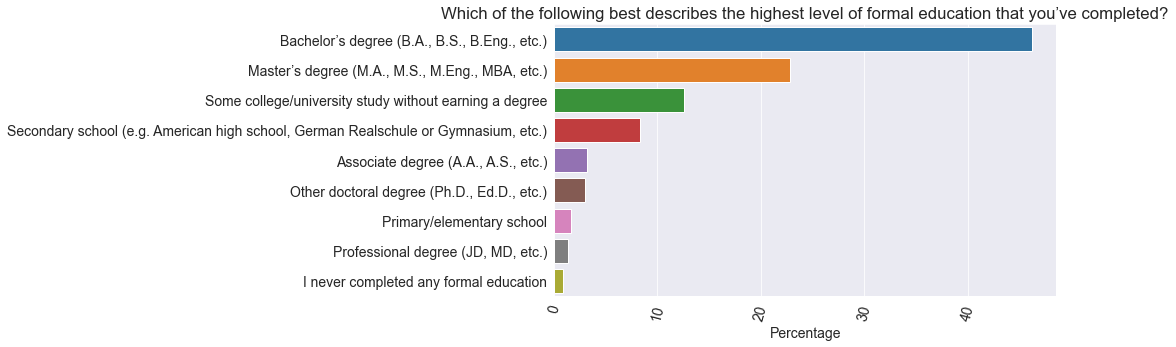

In [27]:
#Education level percentage
pct = survey_df.EdLevel.value_counts(normalize=True)*100

sns.barplot(x= pct,  y = pct.index)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);
plt.xlabel('Percentage');

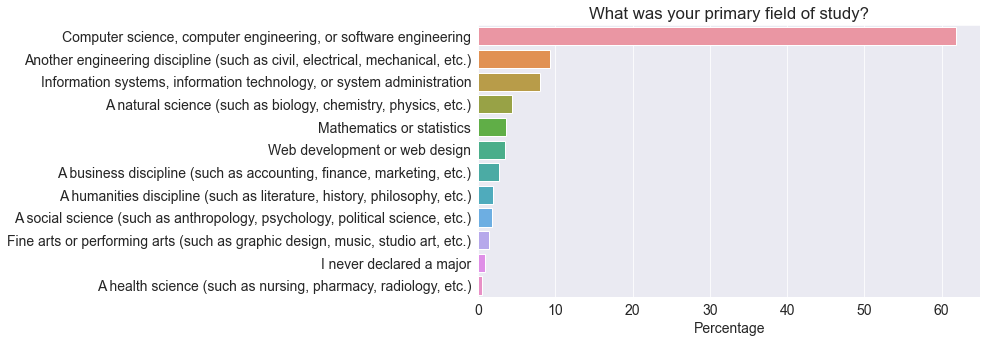

In [28]:
#Field of study
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

In [31]:
schema['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

In [32]:
survey_df['NEWEdImpt'].value_counts()

Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: NEWEdImpt, dtype: int64

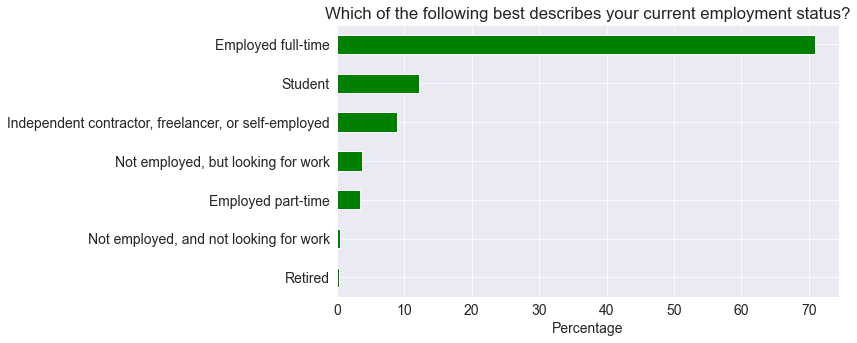

In [30]:
#Important of formal education
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [56]:
def count_func(data,column,split_by):
    types = {}
    a = data[column][data[column].notnull()].str.split(split_by)
    for i in a:
        for j in i:
            if j not in types:
                types[j] = [1]
            else:
                types[j][0] += 1
    return types
types = count_func(survey_df, 'DevType', ';')
devs_type = pd.DataFrame.from_dict(types).sum().sort_values(ascending = False)
devs_type

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [53]:
#Percentage of dev type related to data science
data_science = devs_type[(devs_type.index=='Data scientist or machine learning specialist') | (devs_type.index=='Data or business analyst')].sum()
total = devs_type.sum()
percentage_data_science = data_science/total
percentage_data_science*100

5.083852388941383

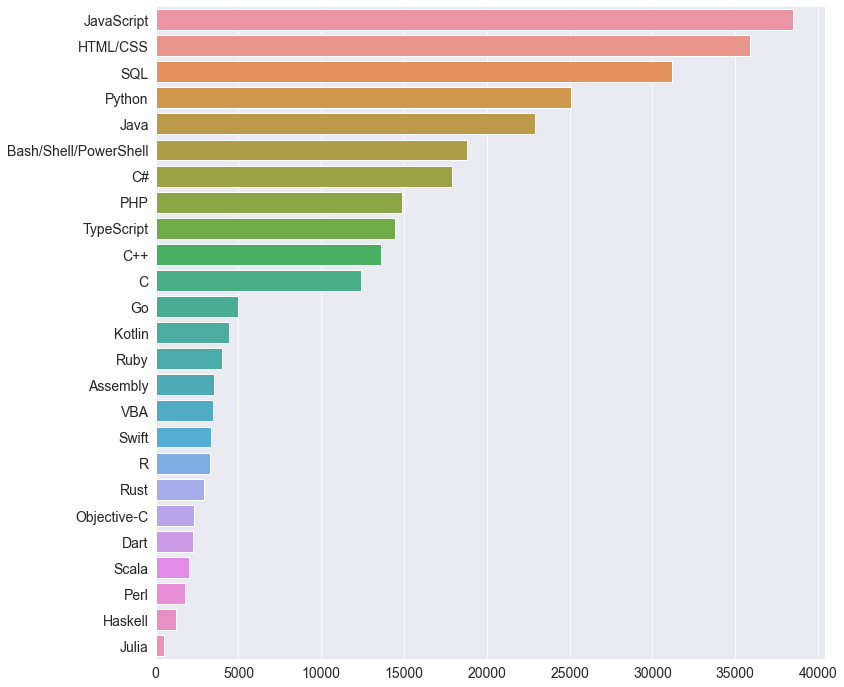

In [70]:
#In the past year
prog_lang = count_func(survey_df, 'LanguageWorkedWith', ';')
lang_series = pd.DataFrame.from_dict(prog_lang).sum().sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=lang_series, y=lang_series.index);

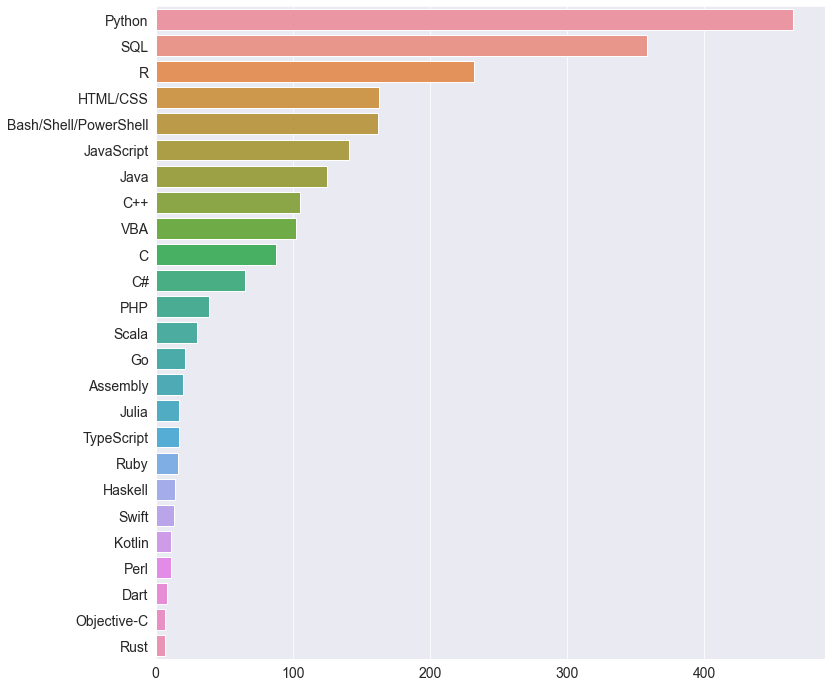

In [78]:
#Filter dev types related to data science
ds = survey_df[survey_df['DevType'].isin(['Data scientist or machine learning specialist',
                                      'Data or business analyst'])]
ds_pl = count_func(ds, 'LanguageWorkedWith', ';')  
ds_pl =  pd.DataFrame.from_dict(ds_pl).sum().sort_values(ascending=False)          
plt.figure(figsize=(12, 12))
sns.barplot(x=ds_pl, y=ds_pl.index);

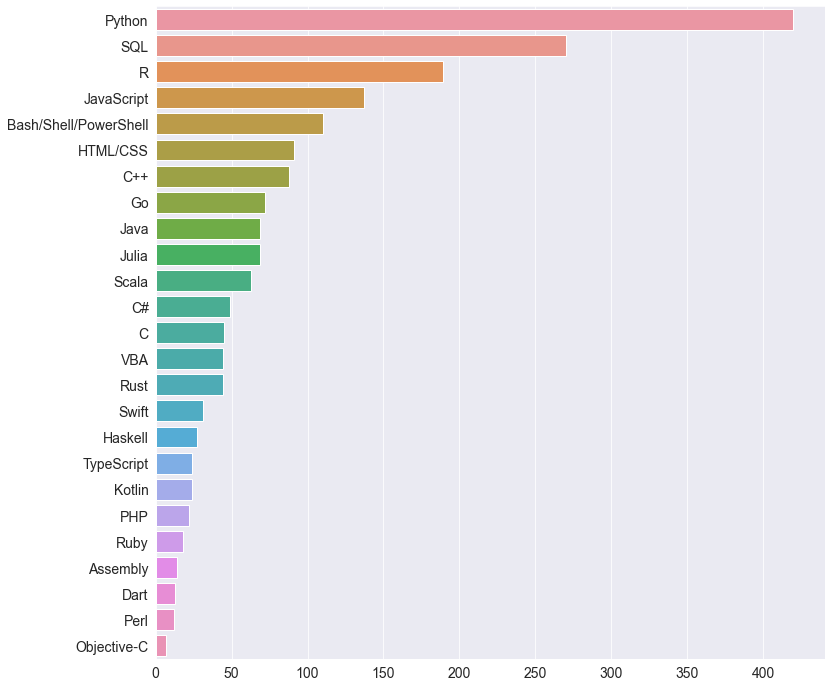

In [79]:
ds_d = count_func(ds, 'LanguageDesireNextYear', ';')
ds_d = pd.DataFrame.from_dict(ds_d).sum().sort_values(ascending=False) 
plt.figure(figsize=(12, 12))
sns.barplot(x=ds_d, y=ds_d.index);

In [83]:
#Functions difference betweeen quantiles
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)


print(survey_df[["Age","Age1stCode","YearsCode"]].agg(iqr))

Age           11.0
Age1stCode     6.0
YearsCode     11.0
dtype: float64


In [88]:
#Group by age and year coding
survey_df.groupby(['Country'])[['Age','YearsCode']].agg([np.mean, np.max, np.min, np.median])

Age                     YearsCode  \
                                           mean  amax  amin median       mean   
Country                                                                         
Afghanistan                           23.571429  32.0  15.0   23.0   8.590909   
Albania                               26.766667  38.0  16.0   25.0   6.953488   
Algeria                               28.019608  99.0  15.0   26.0   7.205479   
Andorra                               39.000000  51.0  30.0   36.0  15.666667   
Angola                                25.500000  29.0  22.0   25.5  12.333333   
...                                         ...   ...   ...    ...        ...   
Venezuela, Bolivarian Republic of...  29.090909  66.0  17.0   25.0  10.800000   
Viet Nam                              25.786585  89.0  13.0   24.5   7.048193   
Yemen                                 31.000000  35.0  27.0   31.0   7.200000   
Zambia                                29.000000  46.0  20.0   28.0   6.000000   
Zimbabwe                              25.578947  33.0  19.0   25.0   6.760000   

                                                        
                                      amax amin median  
Country                                                 
Afghanistan                           50.0  1.0    5.0  
Albania                               20.0  2.0    6.0  
Algeria                               20.0  1.0    6.0  
Andorra                               40.0  2.0   12.0  
Angola                                20.0  8.0    9.0  
...                                    ...  ...    ...  
Venezuela, Bolivarian Republic of...  43.0  2.0    7.0  
Viet Nam                              35.0  1.0    5.0  
Yemen                                 18.0  1.0    5.0  
Zambia                                12.0  2.0    5.0  
Zimbabwe                              18.0  2.0    6.0  

[183 rows x 8 columns]